In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from datetime import datetime
import pytz


In [3]:
pip install squarify

  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/b7/3c/eedbe9fb07cc20fd9a8423da14b03bc270d0570b3ba9174a4497156a2152/squarify-0.4.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("job_descriptions.csv")


In [4]:
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')


In [5]:
def ends_with_vowel(name):
    if pd.isna(name):
        return False
    return name.strip().lower().endswith(('a','e','i','o','u'))


In [6]:
asia_countries = [
    'India','China','Japan','South Korea','North Korea','Nepal','Bhutan',
    'Sri Lanka','Bangladesh','Pakistan','Afghanistan','Thailand','Malaysia',
    'Singapore','Indonesia','Philippines','Vietnam','Cambodia','Laos',
    'Myanmar','Mongolia','Saudi Arabia','UAE','Qatar','Kuwait','Oman',
    'Iran','Iraq','Israel','Jordan','Lebanon','Syria','Yemen'
]


In [31]:
(df['latitude'] < 10)



0          False
1          False
2          False
3           True
4           True
           ...  
1615935     True
1615936    False
1615937    False
1615938    False
1615939    False
Name: latitude, Length: 1615940, dtype: bool

In [32]:

df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')

filtered_df = df[
    (df['Role'] == 'Data Engineer') &
    (df['Job Title'] == 'Data Scientist') &
    (~df['Country'].str.startswith('C', na=False)) &
    (df['Preference'] == 'Female') &
    (df['Qualifications'] == 'B.Tech') &
    (df['Job Portal'] == 'LinkedIn') &
    (df['Company Size'] >= 10000) &
    (df['latitude'] < 10) &
    (df['Job Posting Date'].between('2023-01-01', '2023-06-01')) &
    (df['Contact Person'].str[-1].str.lower().isin(['a','e','i','o','u']))
]



In [33]:
top_companies = (
    filtered_df['Company']
    .value_counts()
    .head(10)
)



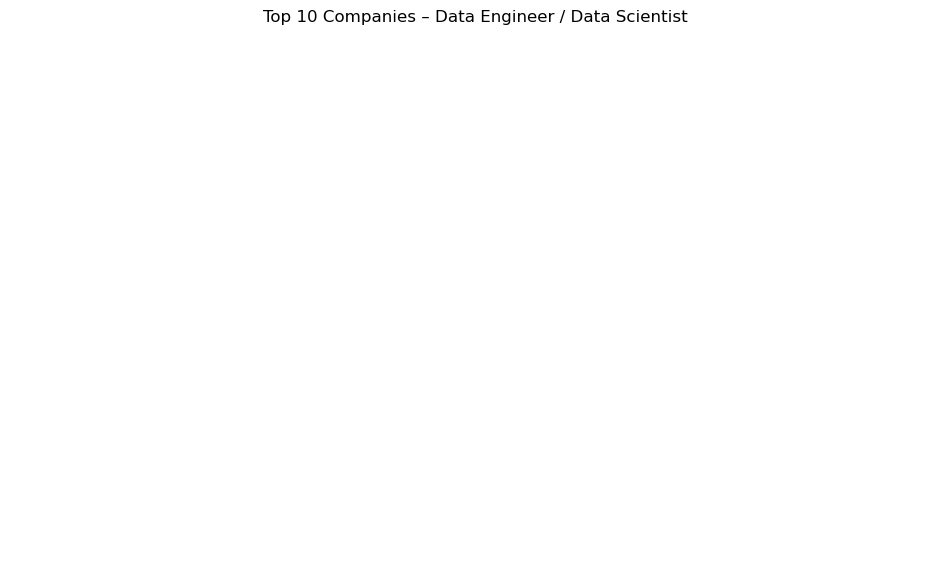

In [35]:
from datetime import datetime
import pytz
import matplotlib.pyplot as plt

PREVIEW_MODE = True  

ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist).time()

start_time = datetime.strptime("15:00", "%H:%M").time()
end_time   = datetime.strptime("17:00", "%H:%M").time()

if PREVIEW_MODE or (start_time <= current_time <= end_time):
    plt.figure(figsize=(12, 7))
    squarify.plot(
        sizes=top_companies.values,
        label=top_companies.index,
        alpha=0.85
    )
    plt.title("Top 10 Companies – Data Engineer / Data Scientist")
    plt.axis('off')
    plt.show()
else:
    print("Tree map visible only between 3 PM and 5 PM IST.")



